In [34]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision

In [35]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available():
    print('cuda is available')
else:
    print('cuda is not available')

cuda is available


In [36]:
# hyperparams
in_features = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.001

In [37]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [38]:
examples = iter(train_loader)
samples, lables = examples.next()
print(samples.shape, lables.shape)
# batch_size, number_of_color_channels, length, width

torch.Size([100, 1, 28, 28]) torch.Size([100])


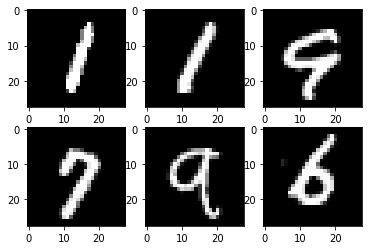

In [39]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')

In [40]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out
    
model = NeuralNet(input_size=in_features, hidden_size=hidden_size, num_classes=num_classes)

In [41]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
device = torch.device('cpu')
# training loop
n_totals_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_totals_steps}, loss = {loss.item():4f}')
            

epoch 1 / 3, step 100/600, loss = 0.480442
epoch 1 / 3, step 200/600, loss = 0.368739
epoch 1 / 3, step 300/600, loss = 0.211909
epoch 1 / 3, step 400/600, loss = 0.252335
epoch 1 / 3, step 500/600, loss = 0.254439
epoch 1 / 3, step 600/600, loss = 0.116944
epoch 2 / 3, step 100/600, loss = 0.132379
epoch 2 / 3, step 200/600, loss = 0.211476
epoch 2 / 3, step 300/600, loss = 0.210841
epoch 2 / 3, step 400/600, loss = 0.241613
epoch 2 / 3, step 500/600, loss = 0.285776
epoch 2 / 3, step 600/600, loss = 0.298632
epoch 3 / 3, step 100/600, loss = 0.178409
epoch 3 / 3, step 200/600, loss = 0.305046
epoch 3 / 3, step 300/600, loss = 0.075942
epoch 3 / 3, step 400/600, loss = 0.152753
epoch 3 / 3, step 500/600, loss = 0.088811
epoch 3 / 3, step 600/600, loss = 0.166059


In [46]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 96.21
